# Initial concentration flux #

Verifying that the concentration flux over the top boundary is initially diffusive. 

Chris Green, 2015 (chris.green@csiro.au)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Initially, the mass flux is purely diffusive, in which case the flux over the top boundary scales as $\sqrt(1/(\pi t))$ where $t$ is time.

In [2]:
tdata = np.linspace(1,100, 100)
cdata = np.sqrt(1/(np.pi * tdata))

## 2D case ##

Read in the data from the 2D test and plot it. For the 2D case, the width of the top boundary is 10 m.

In [7]:
moosedata2D = pd.read_csv('../../tests/2D/gold/2Dddc.csv', header = 0)
width = 10

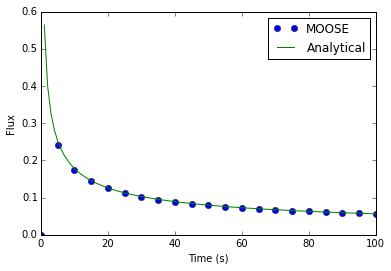

In [11]:
plt.plot(moosedata2D.time, -moosedata2D.boundaryfluxint / width, 'o', label = 'MOOSE', markevery=5)
plt.plot(tdata, cdata, label = 'Analytical')
plt.xlabel('Time (s)')
plt.ylabel('Flux')
plt.legend(loc = 'best')

## 3D case ##

Read in the data from the 3D test and plot it. For the 3D case, the cross-sectional area of the top boundary is 100 m$^2$.

In [14]:
moosedata3D = pd.read_csv('../../tests/3D/gold/3Dddc.csv', header = 0)
area = 100

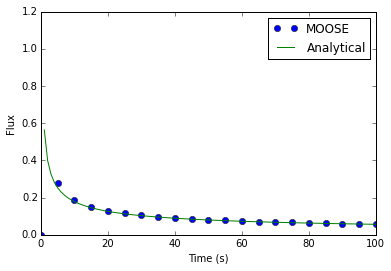

In [17]:
plt.plot(moosedata3D.time, -moosedata3D.boundaryfluxint / area, 'o', label = 'MOOSE', markevery=5)
plt.plot(tdata, cdata, label = 'Analytical')
plt.xlabel('Time (s)')
plt.ylabel('Flux')
plt.legend(loc = 'best')